# Insurance Claims Fraud Detection


## Life Cycle of a Machine Learning Project

1. Data Collection

2. Data Manipulation

- Data Cleaning
- Data Preprocessing

3. Model Training

4. Choosing the best model

5. Creating a Web app

6. Dockerizing the app

7. Model Deployment

- AWS
- Azure
- GCP

8. CICD - Continous Intergration & Continuous Delivery (Production)

- Github Actions

## Data Cleaning 

1. Understanding the problem statement

2. Data checks to perform

4. EDA - EXploratory data Analysis

5. Data-Preprocessing 

- Checking the missing values

- Checking the duplicates

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/insurance_claims.csv")

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df['policy_bind_date'].value_counts()

2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df = df.drop(columns=['_c39'], axis=1)

df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N


In [9]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [10]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
num_cols = df.select_dtypes(exclude="object").columns

num_cols

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [12]:
cat_cols = df.select_dtypes(include="object").columns

cat_cols

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [13]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [14]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [15]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [16]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [17]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [18]:
df.shape

(1000, 39)

In [21]:
## Check data types

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [22]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Numerical Distributions

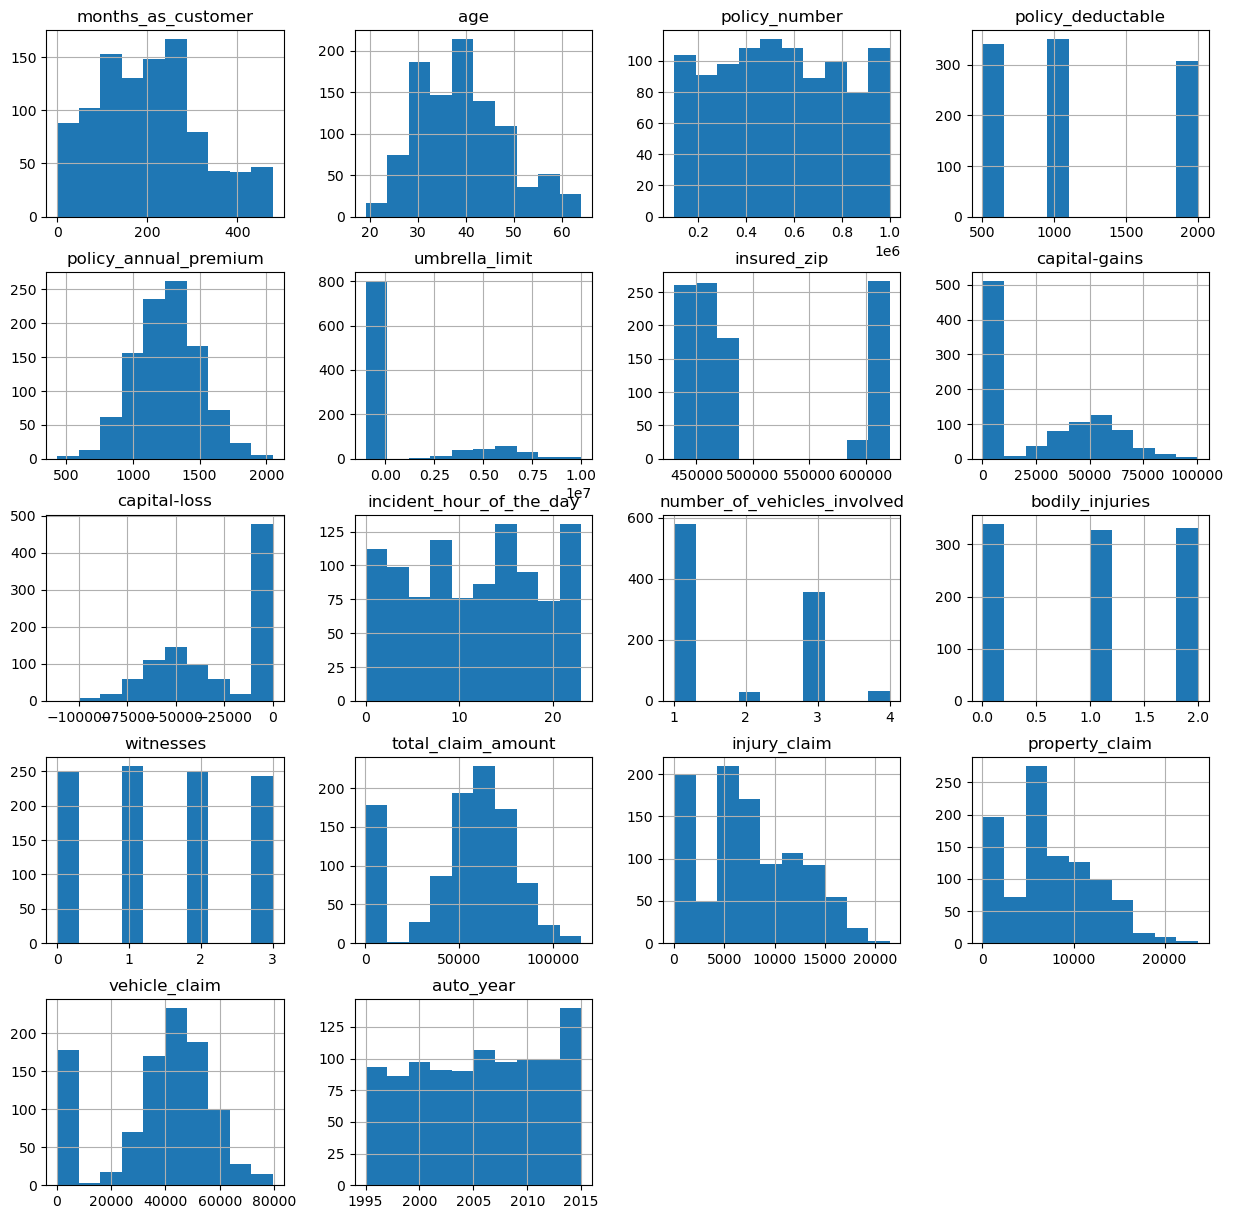

In [24]:
df.hist(figsize=(15,15))
plt.show();

In [25]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Categorical Distributions

In [26]:
df.describe(include="object")

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,2006-01-01,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2015-02-02,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


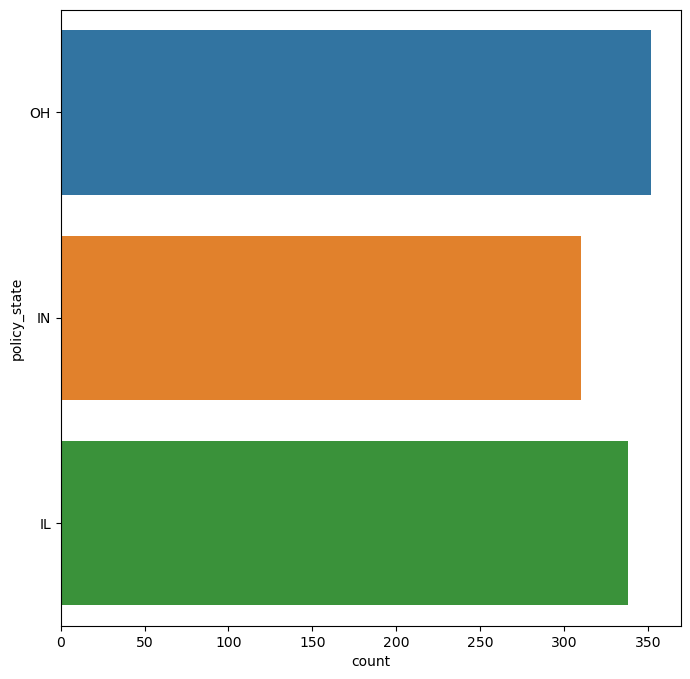

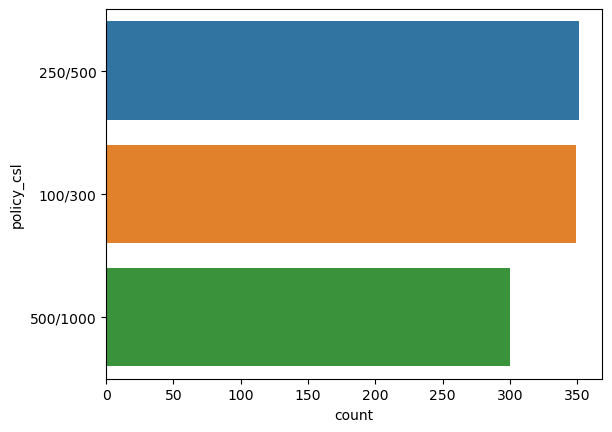

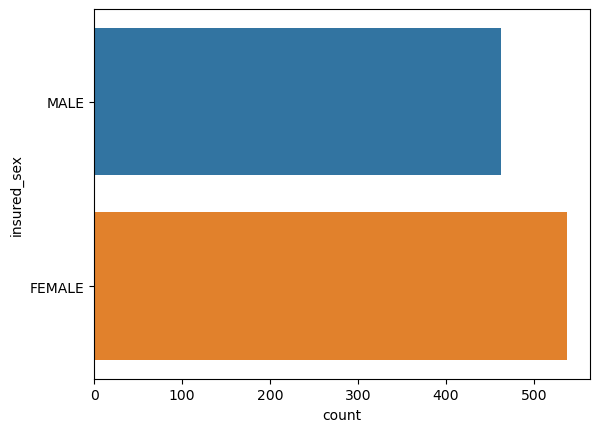

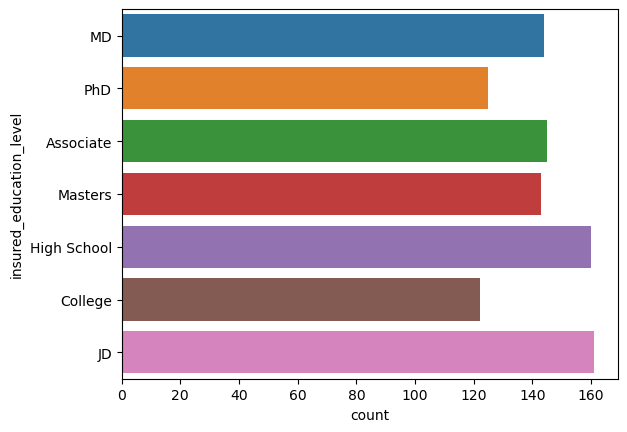

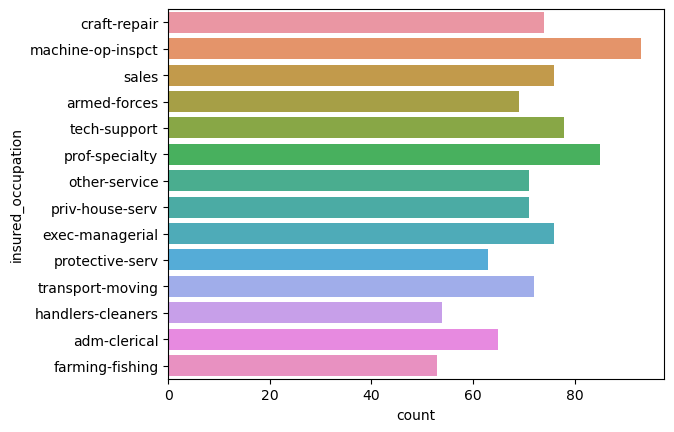

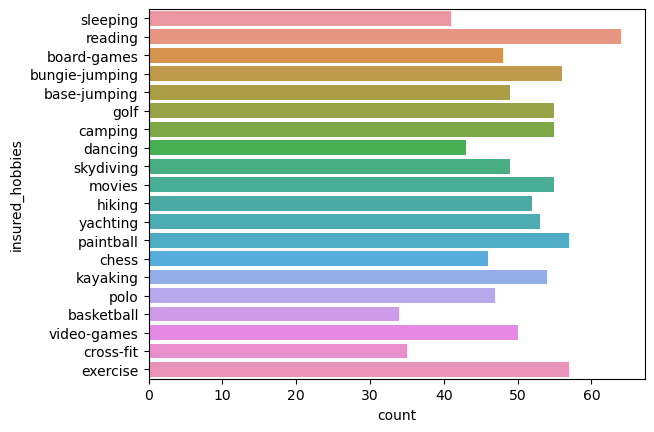

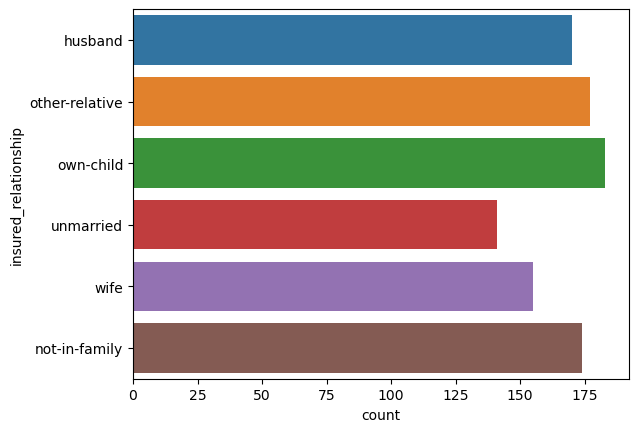

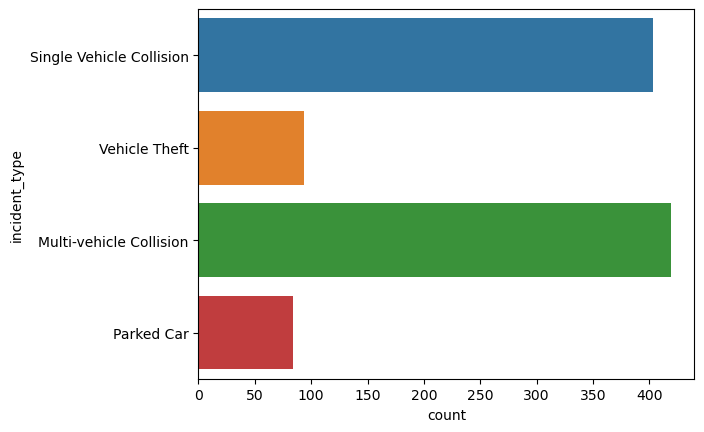

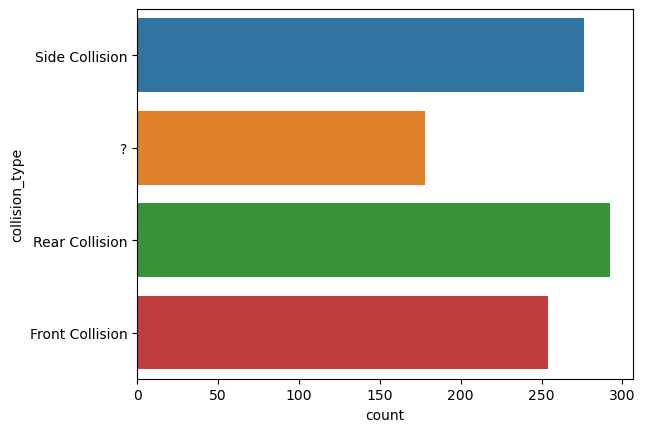

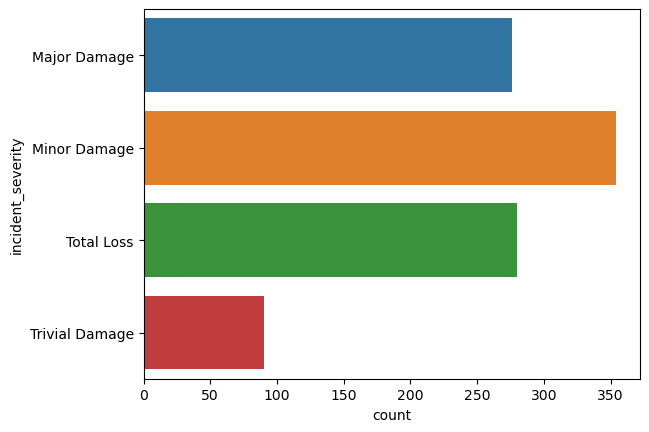

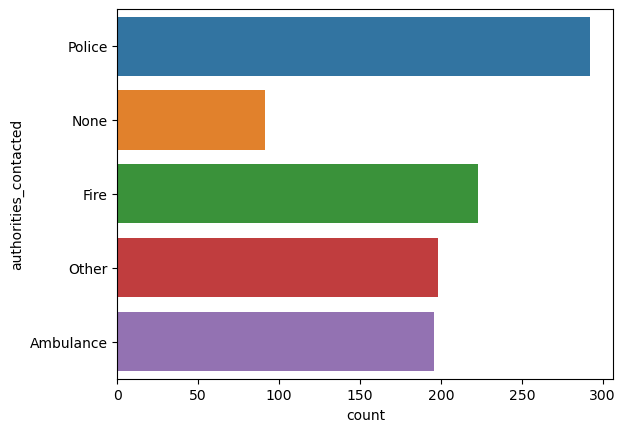

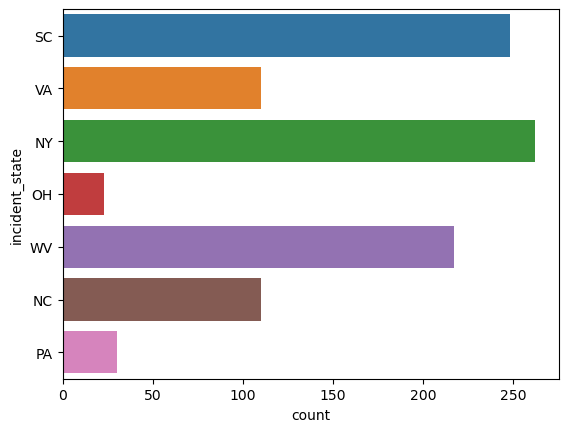

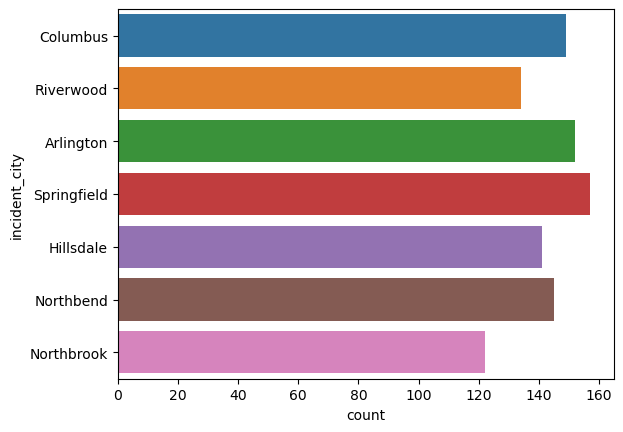

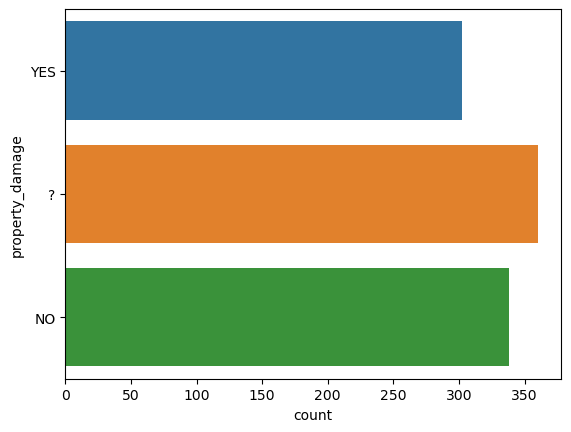

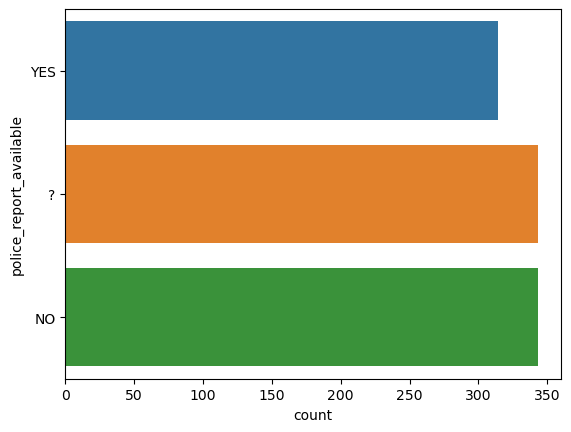

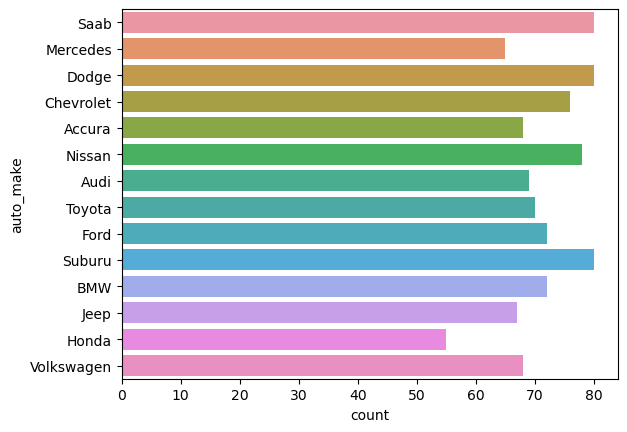

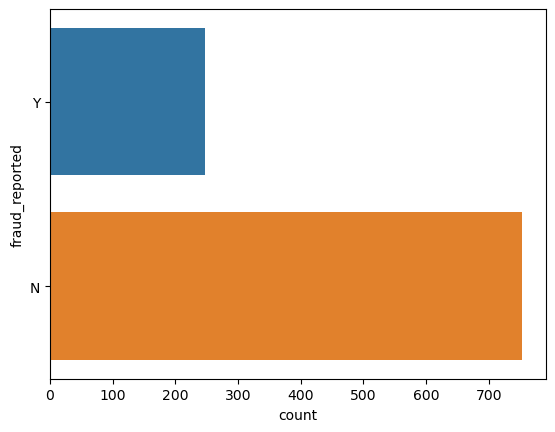

In [33]:
## Plot categorical columns

plt.figure(figsize=(8,8))

for col in df.select_dtypes(include="object"):
    if df[col].nunique() <=20:
        sns.countplot(y=col, data=df)
        plt.show();

In [34]:
num_cols

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

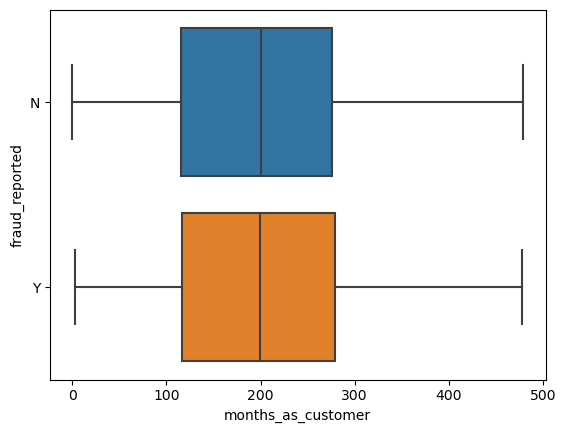

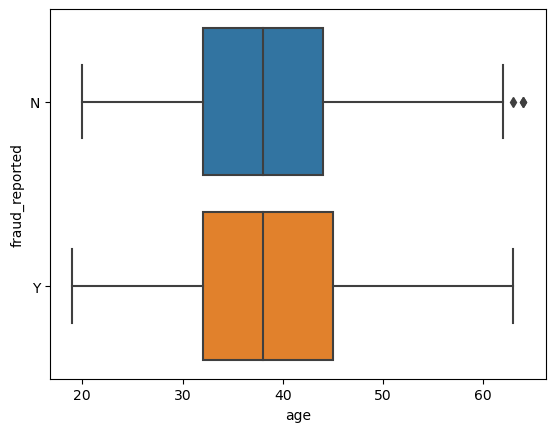

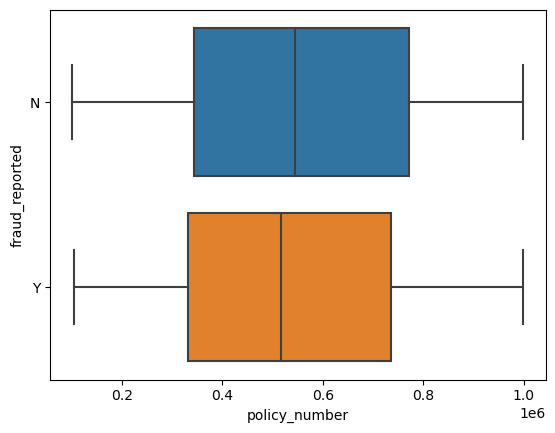

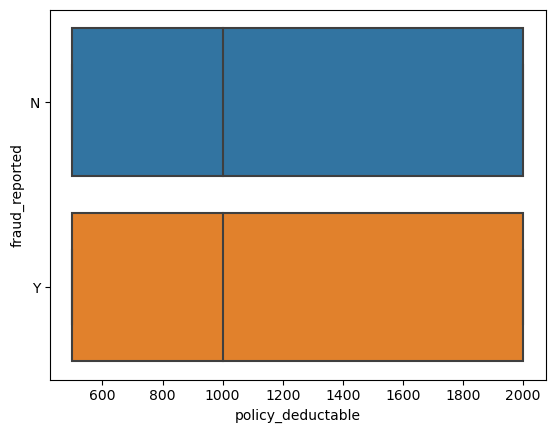

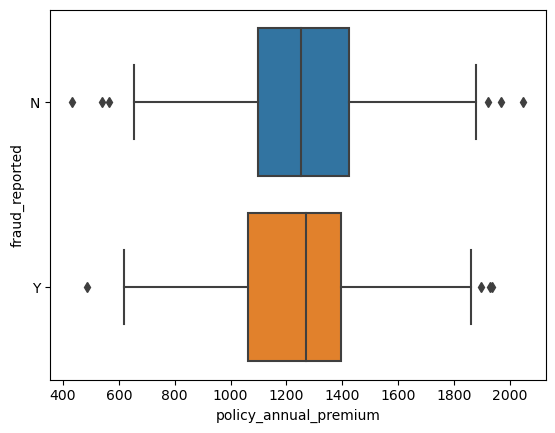

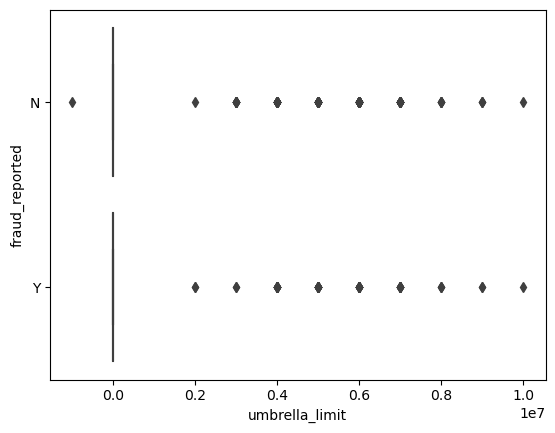

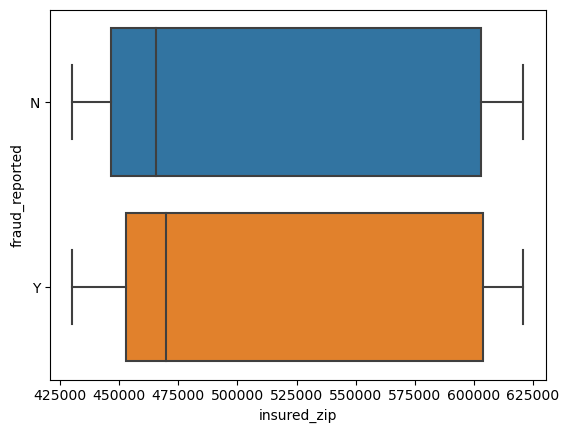

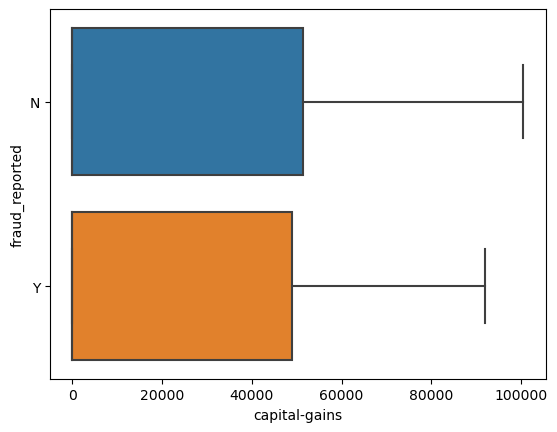

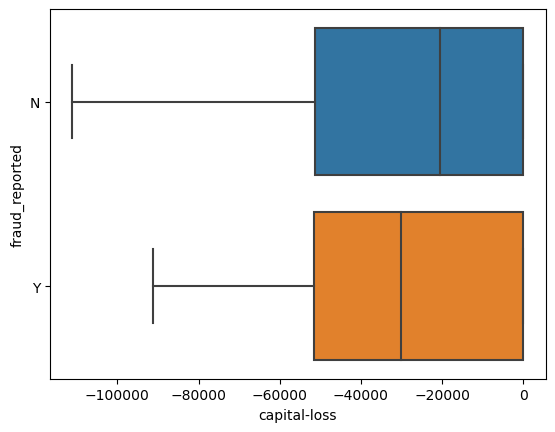

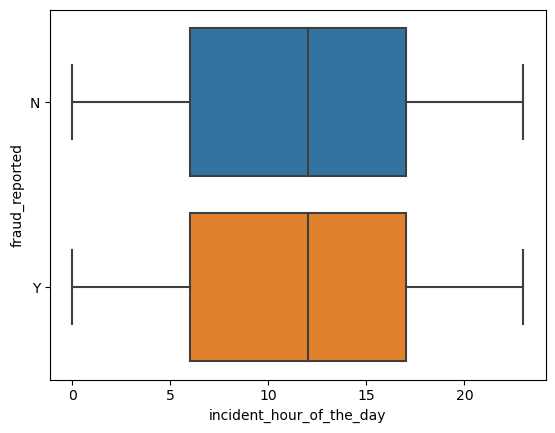

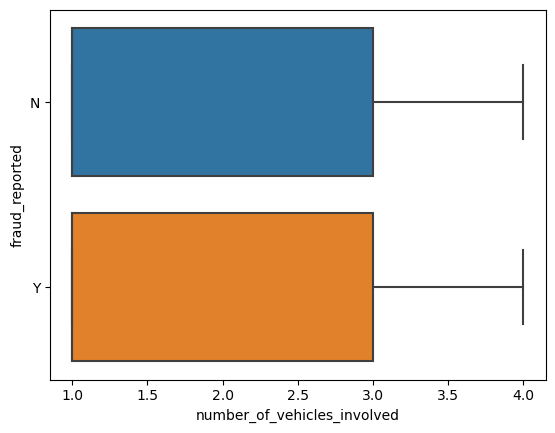

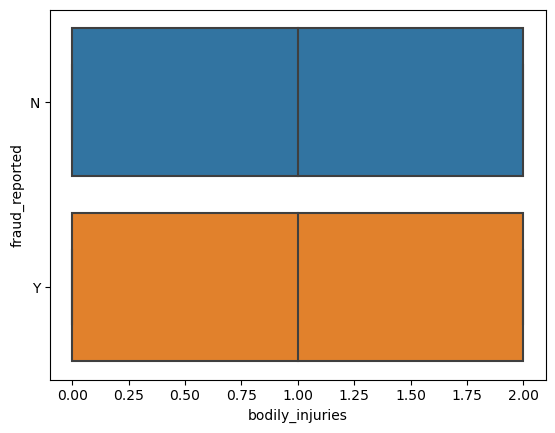

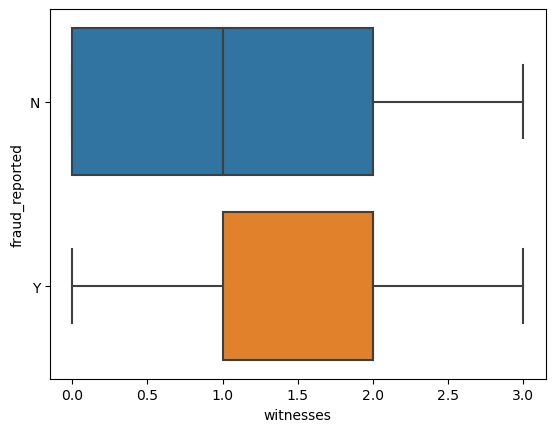

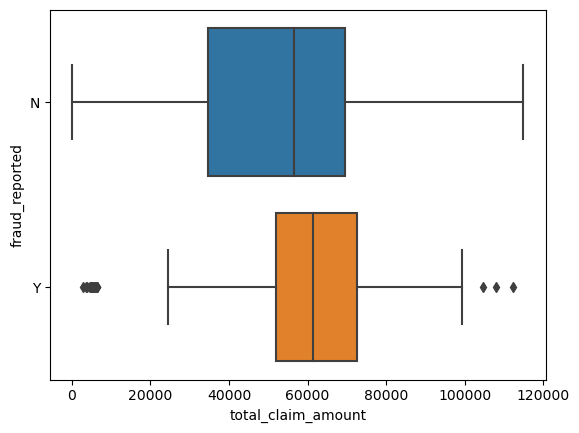

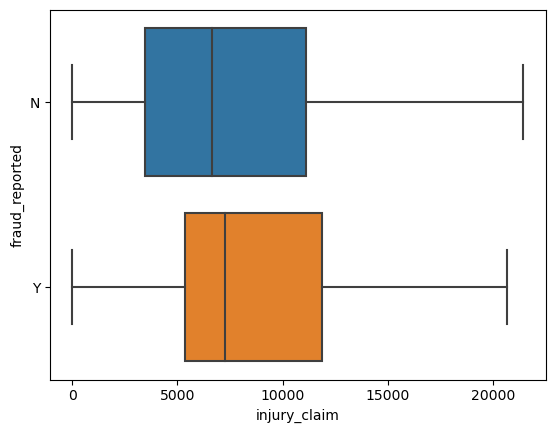

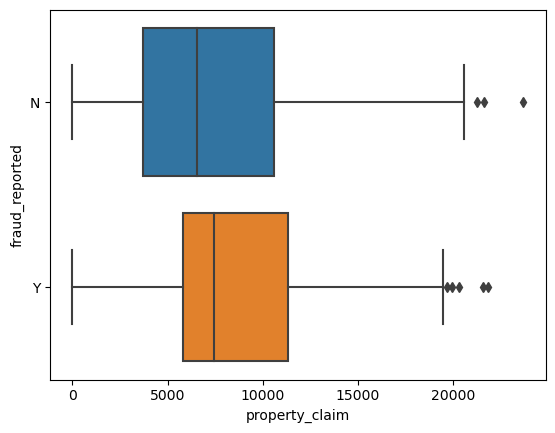

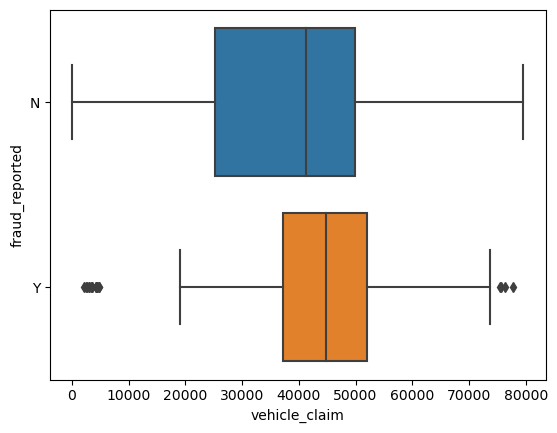

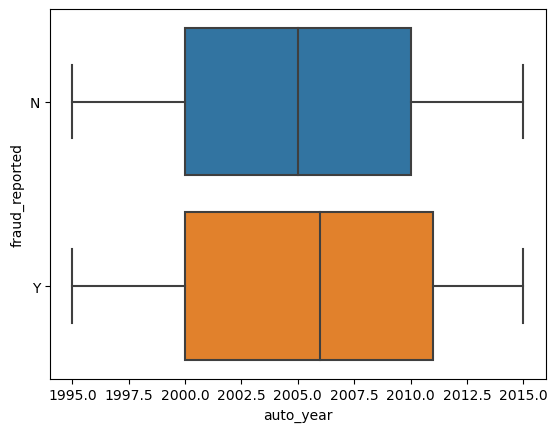

In [35]:
for col in num_cols:
    sns.boxplot(y=df['fraud_reported'].astype('category'), x=col, data=df)
    plt.show();

In [36]:
cat_cols 

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [37]:
for col in cat_cols:
    if df[col].nunique() <=20:
        display(pd.crosstab(df['fraud_reported'], df[col], normalize="index"))

policy_state,IL,IN,OH
fraud_reported,,,
N,0.346614,0.306773,0.346614
Y,0.311741,0.319838,0.368421


policy_csl,100/300,250/500,500/1000
fraud_reported,,,
N,0.343958,0.343958,0.312085
Y,0.364372,0.372470,0.263158


insured_sex,FEMALE,MALE
fraud_reported,,
N,0.545817,0.454183
Y,0.510121,0.489879


insured_education_level,Associate,College,High School,JD,MD,Masters,PhD
fraud_reported,,,,,,,
N,0.147410,0.119522,0.164675,0.158035,0.140770,0.147410,0.122178
Y,0.137652,0.129555,0.145749,0.170040,0.153846,0.129555,0.133603


insured_occupation,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
fraud_reported,,,,,,,,,,,,,,
N,0.071713,0.069057,0.069057,0.063745,0.049137,0.057105,0.094290,0.078353,0.078353,0.088977,0.065073,0.073041,0.074369,0.067729
Y,0.044534,0.068826,0.089069,0.113360,0.064777,0.044534,0.089069,0.048583,0.048583,0.072874,0.056680,0.085020,0.089069,0.085020


insured_hobbies,base-jumping,basketball,board-games,bungie-jumping,camping,chess,cross-fit,dancing,exercise,golf,hiking,kayaking,movies,paintball,polo,reading,skydiving,sleeping,video-games,yachting
fraud_reported,,,,,,,,,,,,,,,,,,,,
N,0.047809,0.037185,0.045153,0.062417,0.066401,0.010624,0.011952,0.050465,0.061089,0.065073,0.053121,0.065073,0.061089,0.058433,0.045153,0.062417,0.050465,0.043825,0.053121,0.049137
Y,0.052632,0.024291,0.056680,0.036437,0.020243,0.153846,0.105263,0.020243,0.044534,0.024291,0.048583,0.020243,0.036437,0.052632,0.052632,0.068826,0.044534,0.032389,0.040486,0.064777


insured_relationship,husband,not-in-family,other-relative,own-child,unmarried,wife
fraud_reported,,,,,,
N,0.179283,0.171315,0.166003,0.191235,0.142098,0.150066
Y,0.141700,0.182186,0.210526,0.157895,0.137652,0.170040


incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
fraud_reported,,,,
N,0.405046,0.100930,0.379814,0.114210
Y,0.461538,0.032389,0.473684,0.032389


collision_type,?,Front Collision,Rear Collision,Side Collision
fraud_reported,,,,
N,0.215139,0.244356,0.266932,0.273572
Y,0.064777,0.283401,0.368421,0.283401


incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
fraud_reported,,,,
N,0.144754,0.419655,0.324037,0.111554
Y,0.676113,0.153846,0.145749,0.024291


authorities_contacted,Ambulance,Fire,None,Other,Police
fraud_reported,,,,,
N,0.184595,0.216467,0.112882,0.179283,0.306773
Y,0.230769,0.242915,0.024291,0.255061,0.246964


incident_state,NC,NY,OH,PA,SC,VA,WV
fraud_reported,,,,,,,
N,0.100930,0.270916,0.017264,0.029216,0.232404,0.112882,0.236388
Y,0.137652,0.234818,0.040486,0.032389,0.295547,0.101215,0.157895


incident_city,Arlington,Columbus,Hillsdale,Northbend,Northbrook,Riverwood,Springfield
fraud_reported,,,,,,,
N,0.143426,0.146082,0.14077,0.147410,0.126162,0.138114,0.158035
Y,0.178138,0.157895,0.14170,0.137652,0.109312,0.121457,0.153846


property_damage,?,NO,YES
fraud_reported,,,
N,0.341301,0.361222,0.297477
Y,0.417004,0.267206,0.315789


police_report_available,?,NO,YES
fraud_reported,,,
N,0.337317,0.341301,0.321381
Y,0.360324,0.348178,0.291498


auto_make,Accura,Audi,BMW,Chevrolet,Dodge,Ford,Honda,Jeep,Mercedes,Nissan,Saab,Suburu,Toyota,Volkswagen
fraud_reported,,,,,,,,,,,,,,
N,0.073041,0.063745,0.069057,0.073041,0.079681,0.066401,0.054449,0.074369,0.057105,0.084993,0.082337,0.081009,0.075697,0.065073
Y,0.052632,0.085020,0.080972,0.085020,0.080972,0.089069,0.056680,0.044534,0.089069,0.056680,0.072874,0.076923,0.052632,0.076923


fraud_reported,N,Y
fraud_reported,,
N,1.0,0.0
Y,0.0,1.0


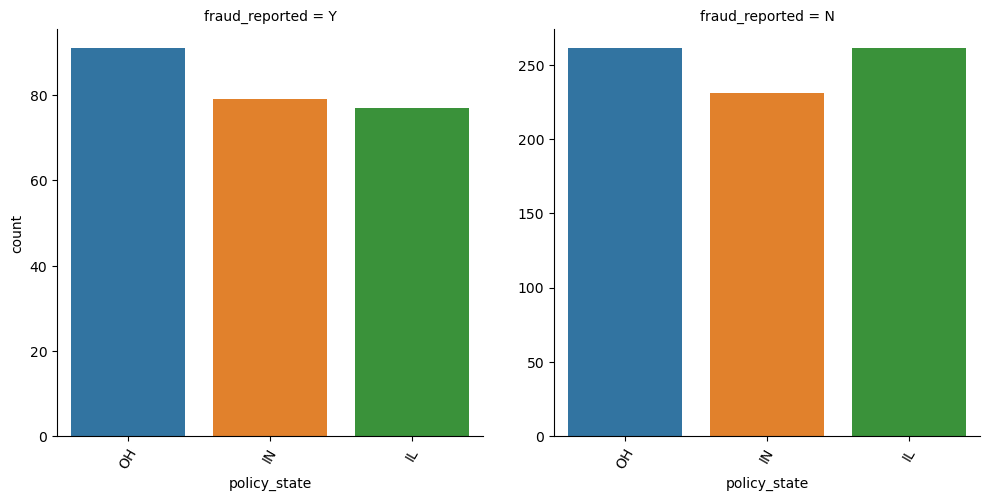

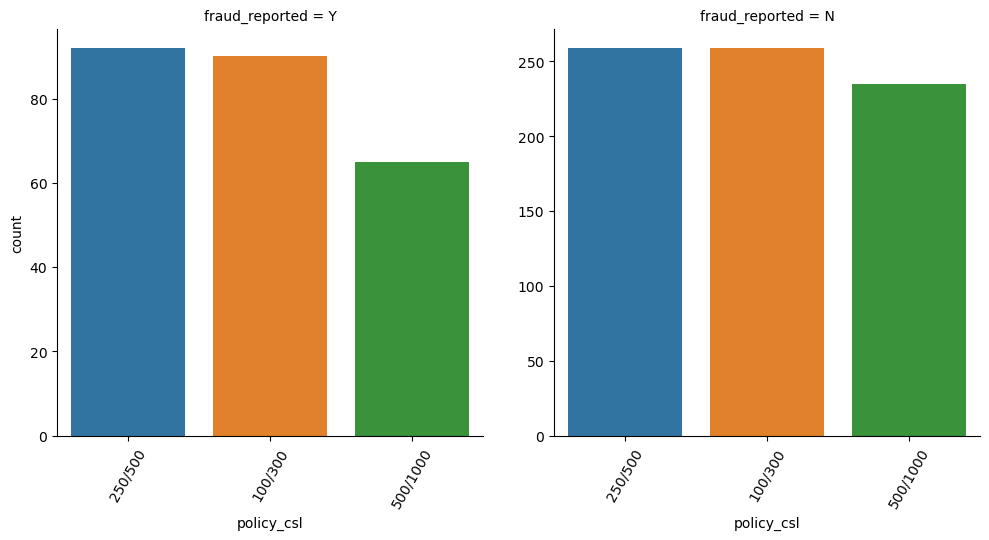

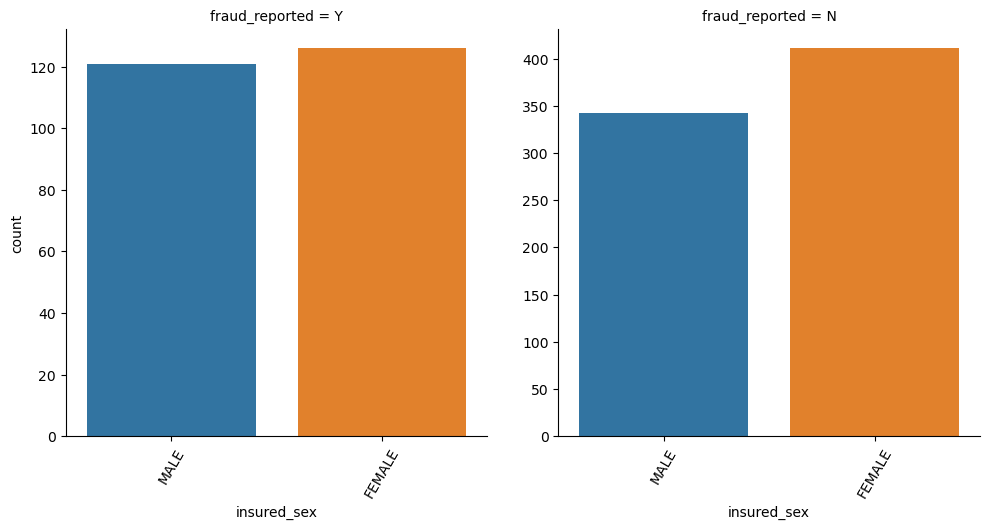

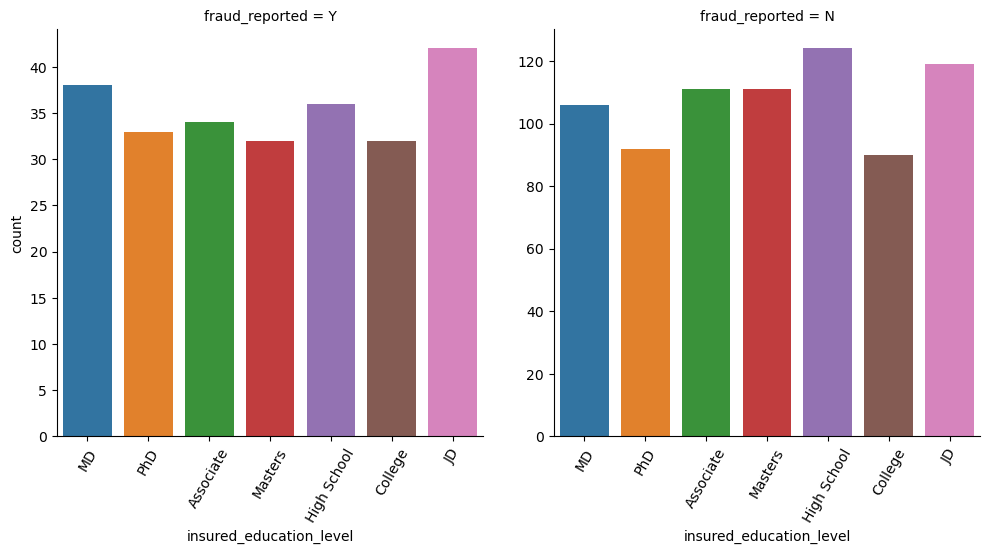

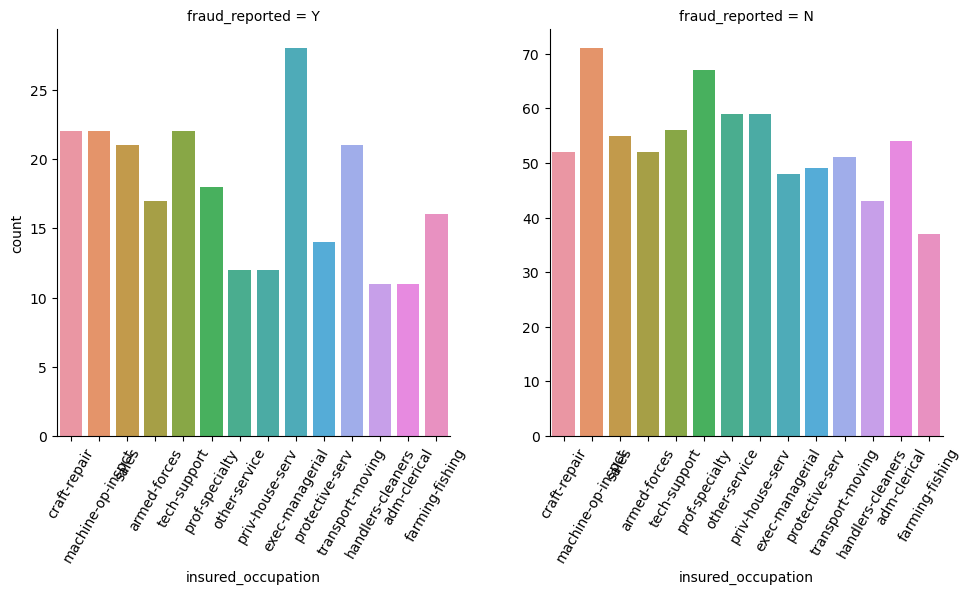

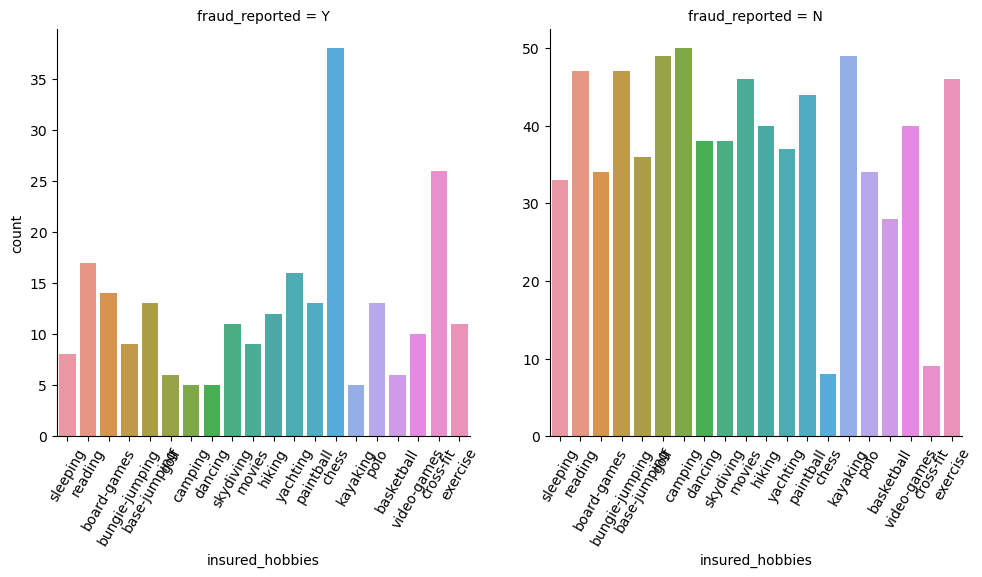

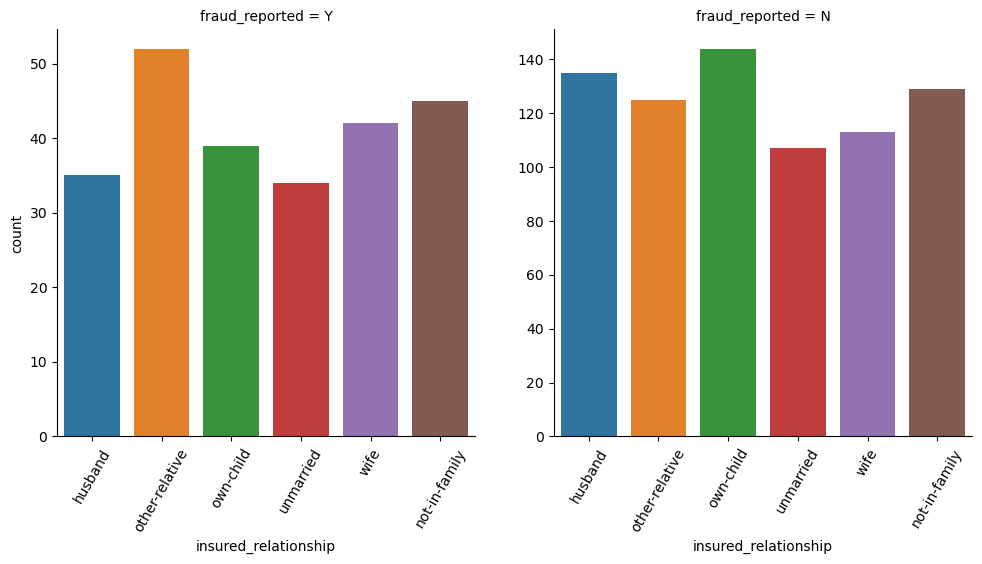

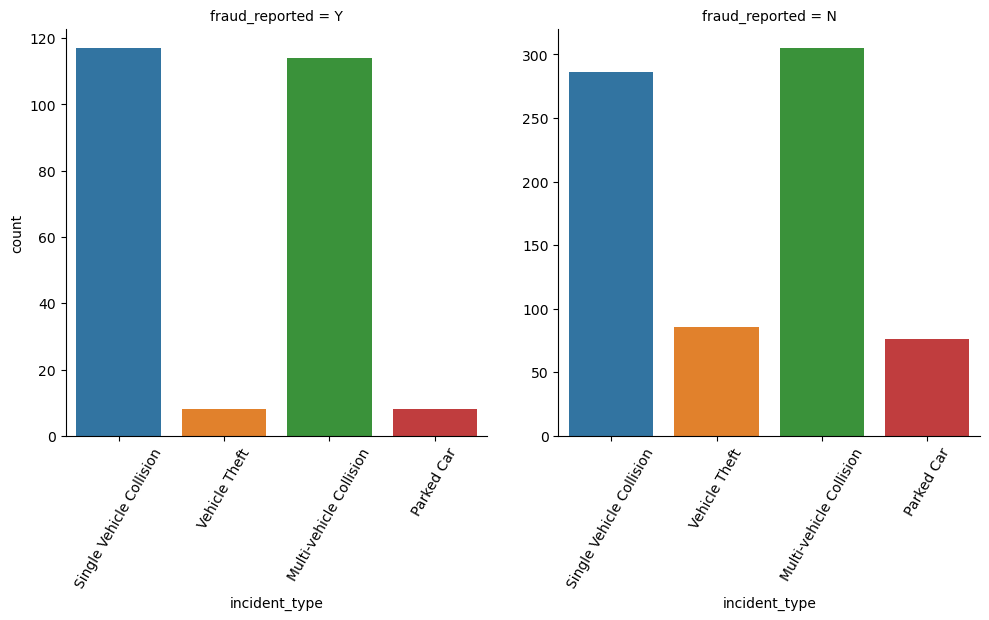

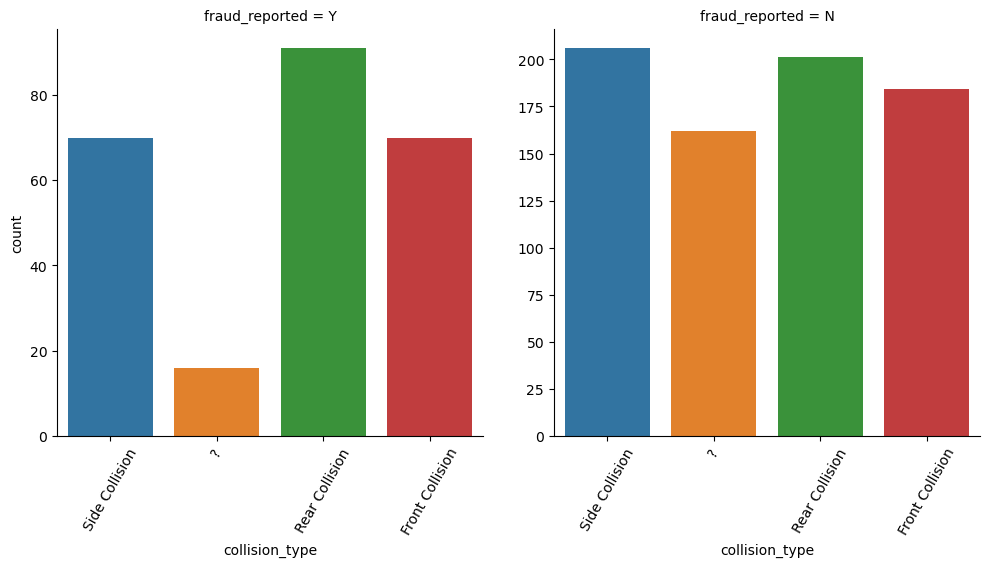

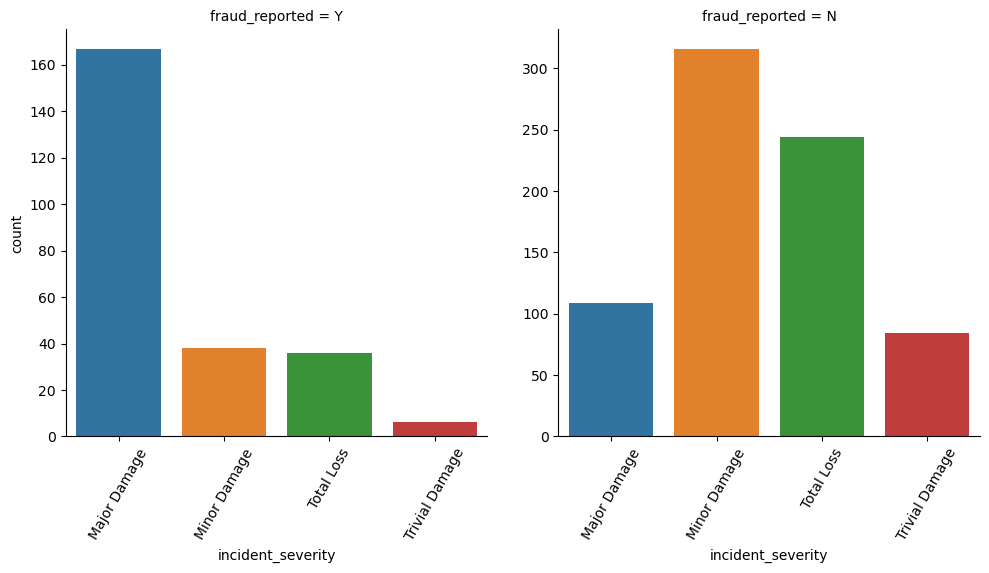

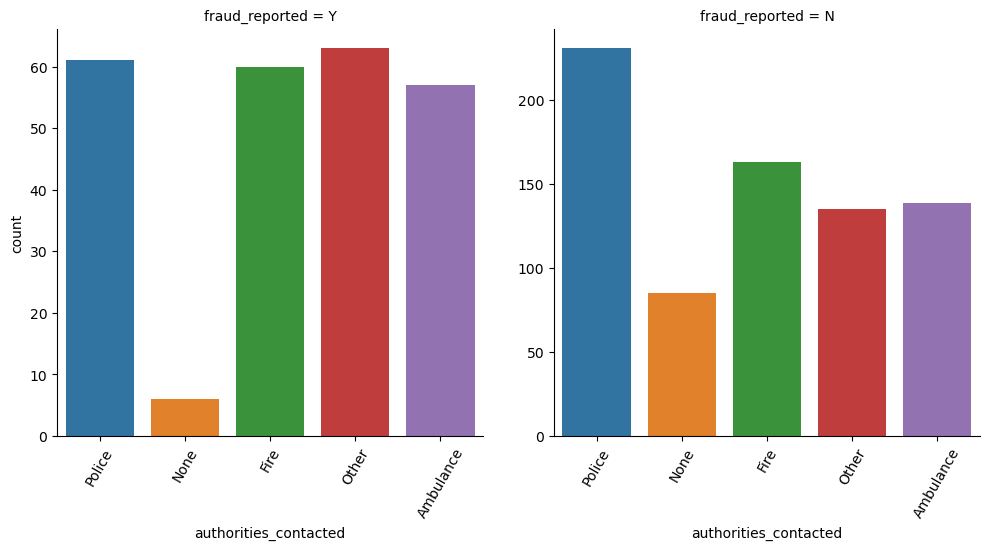

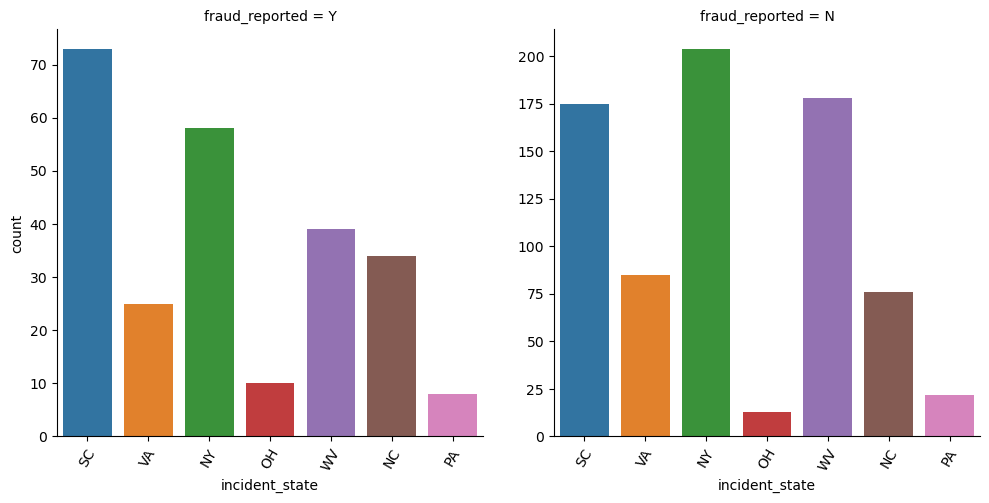

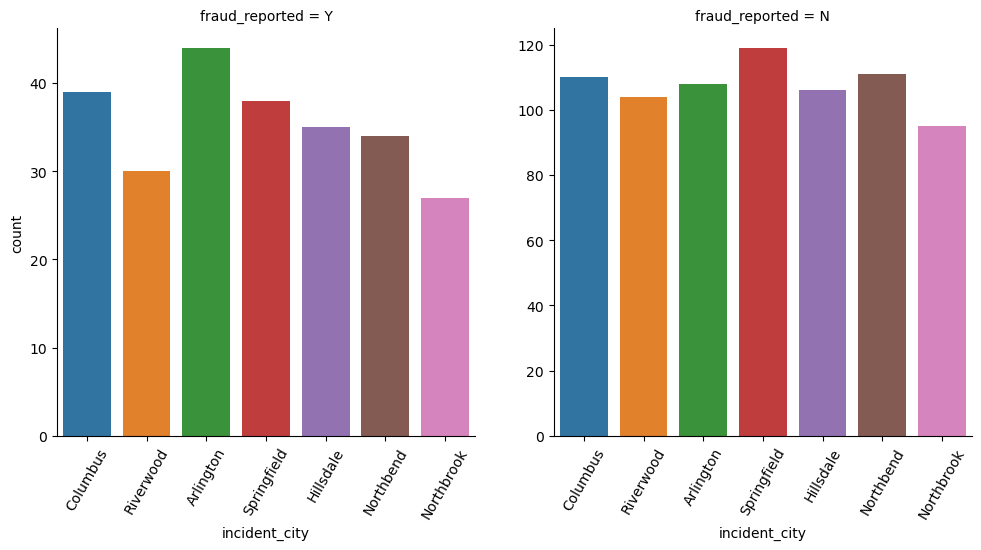

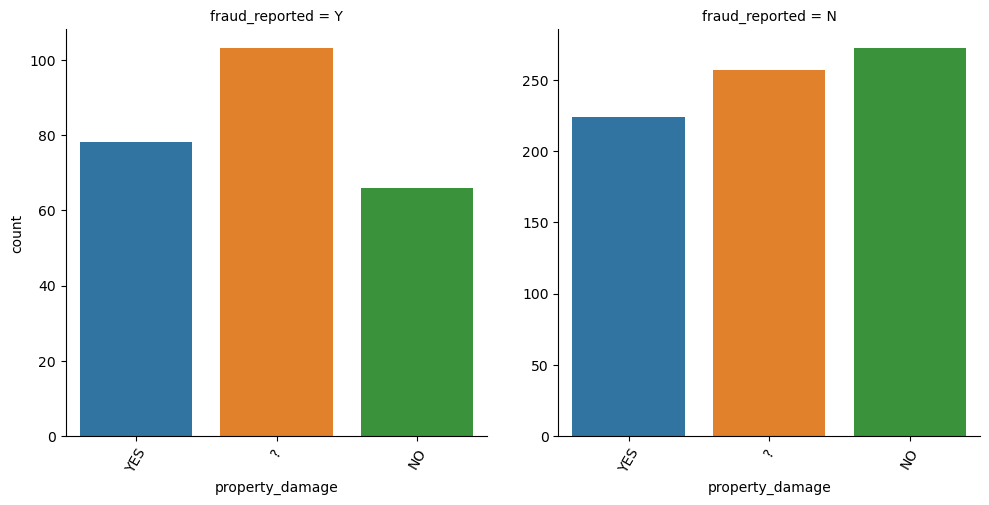

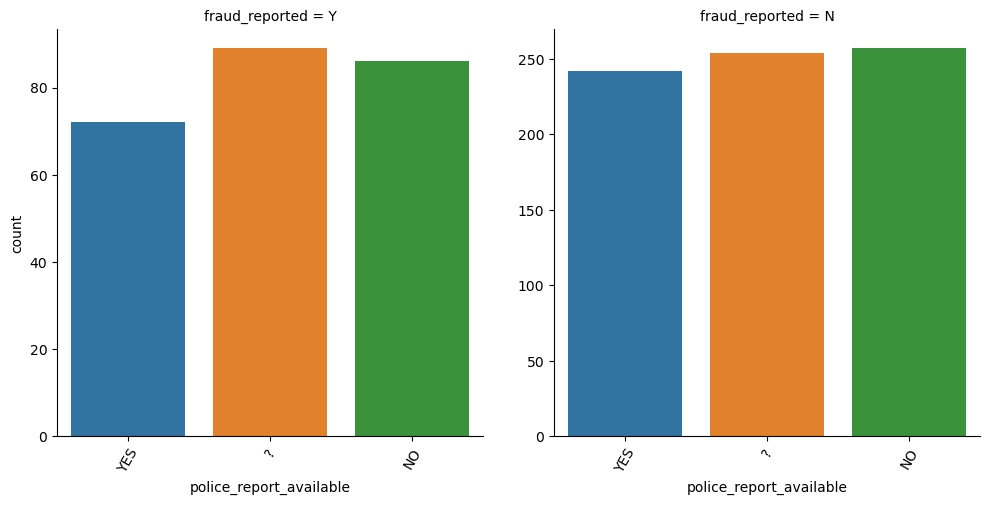

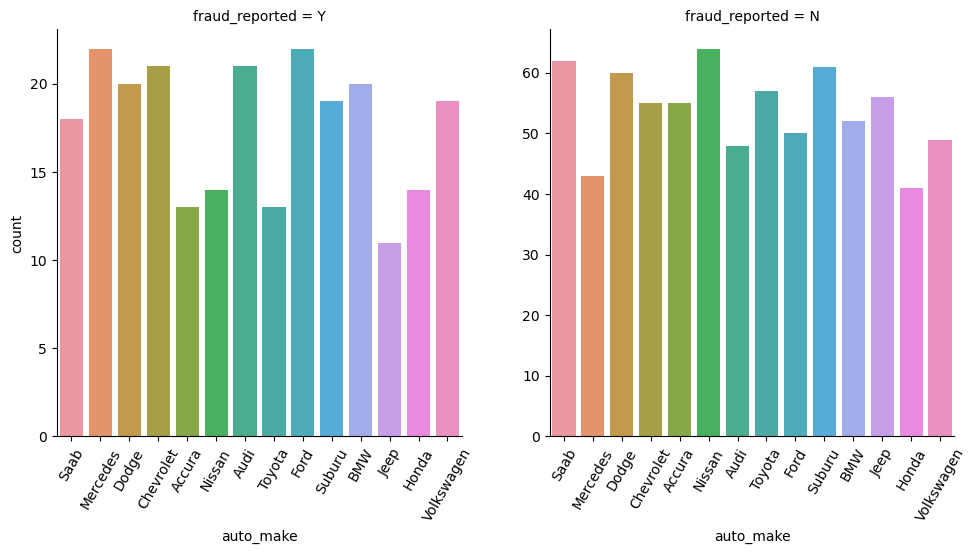

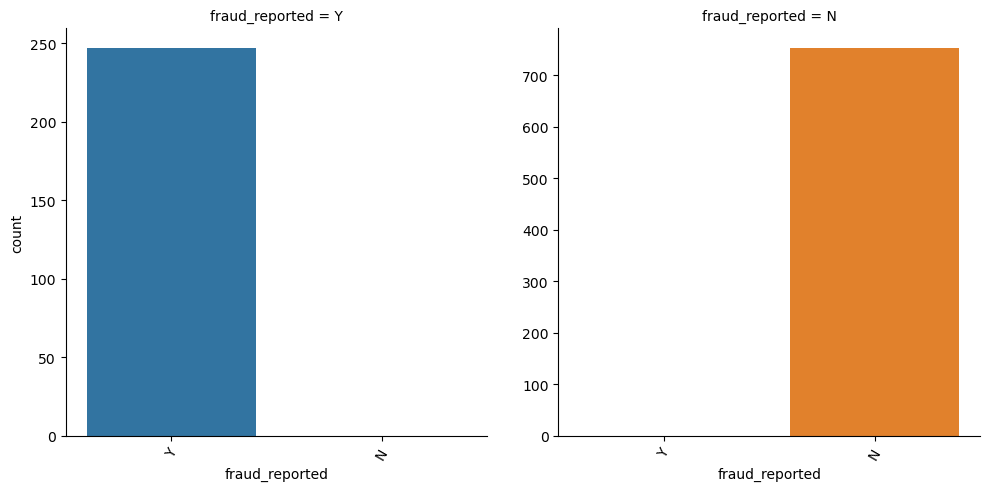

In [39]:
for col in cat_cols:
    if df[col].nunique() <= 20:
        g = sns.catplot(x=col, kind="count", col="fraud_reported", data=df, sharey=False)
        g.set_xticklabels(rotation=60)

In [40]:
## Check correlation

corr = df.corr()

corr

C:\Users\gaura\AppData\Local\Temp\ipykernel_7700\2570909201.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


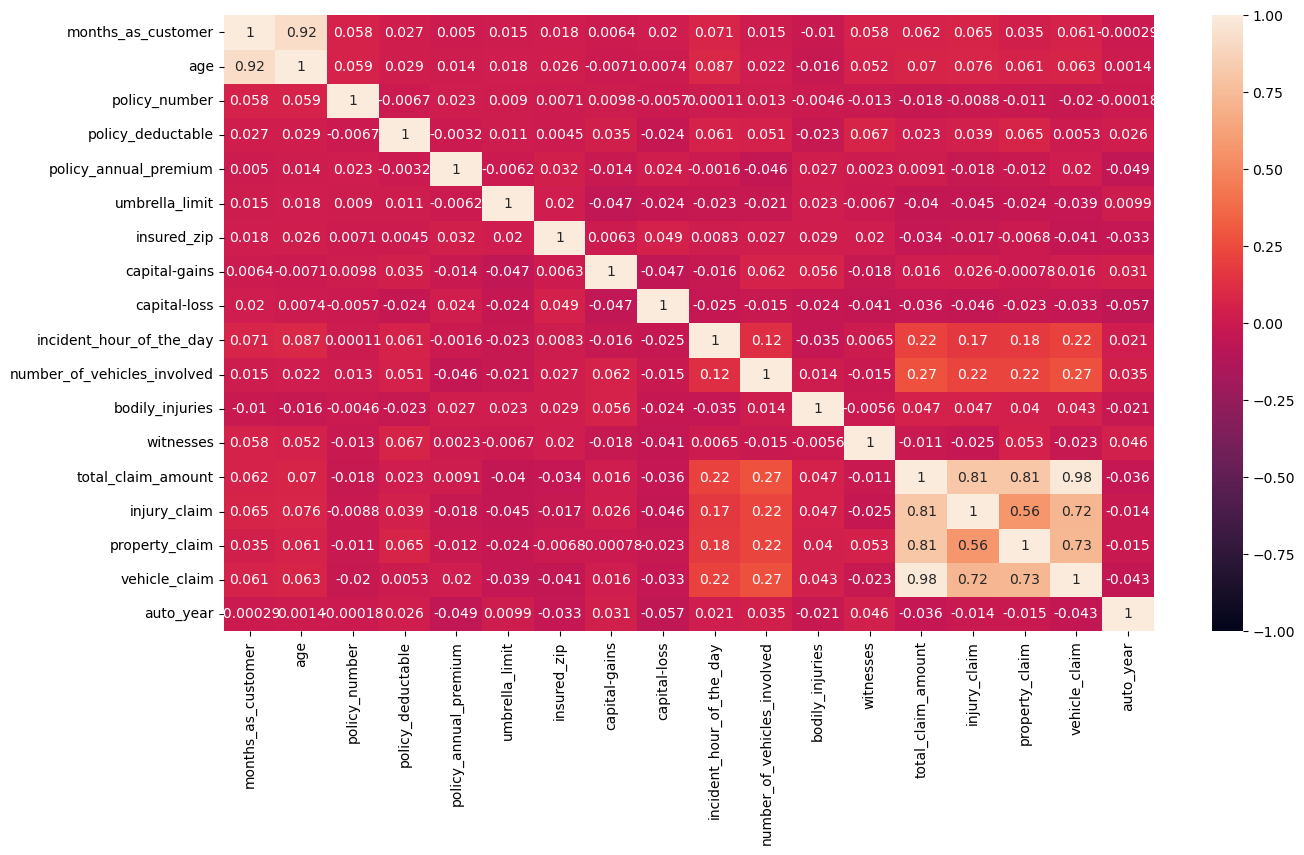

In [46]:
## Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1)
plt.show()